In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
sales_train = pd.read_csv('sales_train.csv')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [3]:
# lets change the date to datetime64[ns]
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train.date

0         2013-01-02
1         2013-01-03
2         2013-01-05
3         2013-01-06
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2935849, dtype: datetime64[ns]

In [4]:
sales_train.item_cnt_day.groupby(sales_train.date).sum()

date
2013-01-01    1951.0
2013-01-02    8198.0
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
               ...  
2015-10-27    1551.0
2015-10-28    3593.0
2015-10-29    1589.0
2015-10-30    2274.0
2015-10-31    3104.0
Name: item_cnt_day, Length: 1034, dtype: float64

In [5]:
print(pd.to_datetime('2015-11-01') - pd.to_datetime('2013-01-01'))

1034 days 00:00:00


In [6]:
pd.to_datetime('2013-10-01') - pd.to_datetime('2013-01-01')

Timedelta('273 days 00:00:00')

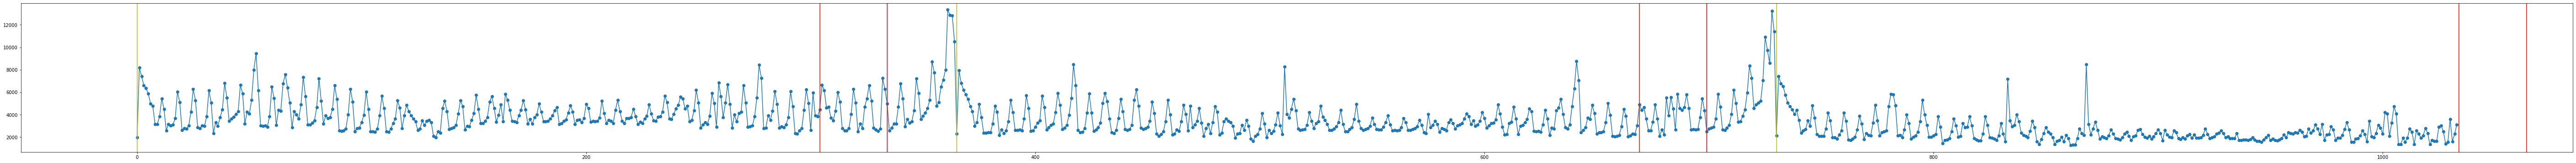

In [7]:
plt.figure(figsize=(100,6))
date_sum = sales_train.item_cnt_day.groupby(sales_train.date).sum()
plt.plot(np.arange(1034), date_sum.values, '-o')
for i in range(0, 1000, 365):
    plt.axvline(i, c='y')
    plt.axvline(i + 304, c='r')
    plt.axvline(i + 334, c='r');

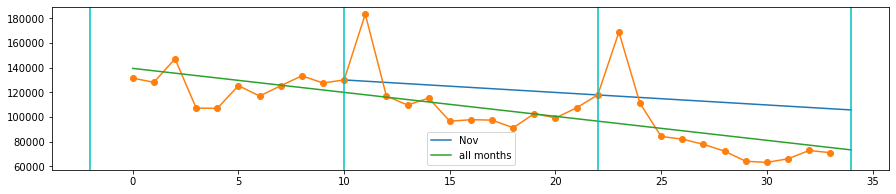

In [8]:
month_sum = sales_train.item_cnt_day.groupby(sales_train.date_block_num).sum()

X = np.arange(34).reshape(-1, 1)
reg = LinearRegression().fit(X, month_sum)
    
plt.figure(figsize=(15,3))
plt.plot([10, 22, 34],[month_sum[10], month_sum[22], 2 * month_sum[22] - month_sum[10]], label='Nov')
plt.plot(np.arange(34), month_sum, '-o')
plt.plot([0, 34], reg.predict([[0], [34]]), label='all months')
for i in range(-2, 35, 12):
    plt.axvline(i, c='c')
plt.legend();

[0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]

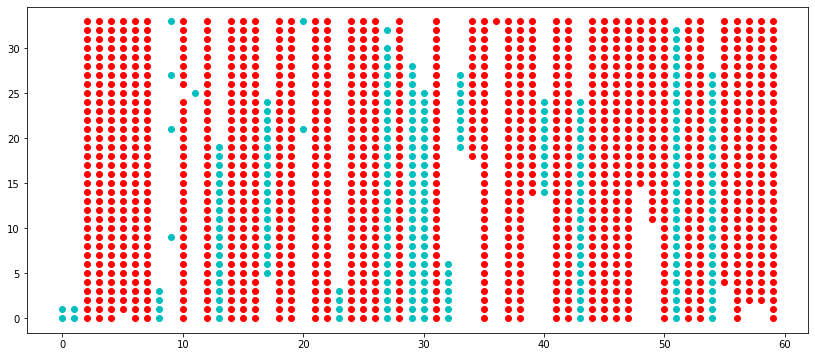

In [9]:
active_shops = []
na_shops = []
plt.figure(figsize=(14,6))
for i in range(60):
    one_shop_month_sum = sales_train.item_cnt_day[sales_train.shop_id == i].groupby(sales_train.date_block_num).sum()
    if 33 in one_shop_month_sum.index and i not in [9, 20]:
        active_shops.append(i)
        clr = 'r'
    else:
        na_shops.append(i)
        clr = 'c'
    plt.scatter(np.full(len(one_shop_month_sum), i), one_shop_month_sum.index, c=clr);
na_shops

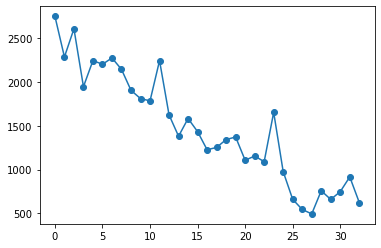

In [10]:
shop51 = sales_train.item_cnt_day[sales_train.shop_id == 51].groupby(sales_train.date_block_num).sum()
plt.plot(np.arange(33), shop51, '-o');

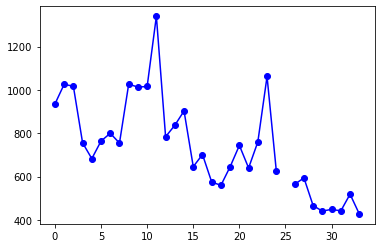

In [11]:
shop10 = sales_train.item_cnt_day[sales_train.shop_id == 10].groupby(sales_train.date_block_num).sum()
plt.plot(np.arange(25), shop10[:25], '-o', c='b')
plt.plot(np.arange(26,34), shop10[25:33], '-o', c='b');

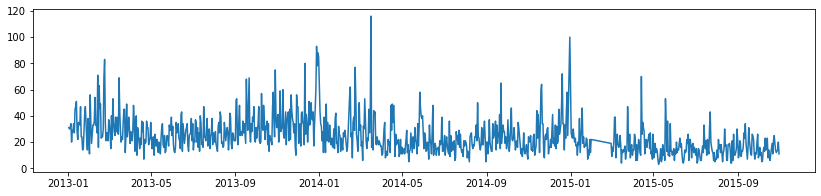

In [12]:
plt.figure(figsize=(14,3))
shop10 = sales_train[sales_train.shop_id == 10].groupby(sales_train.date).sum()
plt.plot(shop10.index, shop10.item_cnt_day);

In [13]:
sales_train[(sales_train.shop_id == 9) | (sales_train.shop_id == 20)].groupby(sales_train.date).sum()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-10-03,2061,2061,2918914,230540.156250,543.0
2013-10-04,3384,3384,4167399,432042.196014,1573.0
2013-10-05,4122,4122,5651014,481779.393721,2131.0
2013-10-06,3825,3825,4930711,473374.857872,2279.0
2014-10-02,7623,4719,5270757,451598.388571,758.0
2014-10-03,12999,8090,9285424,761033.350352,2533.0
2014-10-04,15540,9960,11005418,958433.179373,3219.0
2014-10-05,13419,8864,9199747,812966.021519,2907.0
2014-10-06,21,20,20415,5999.000000,-1.0


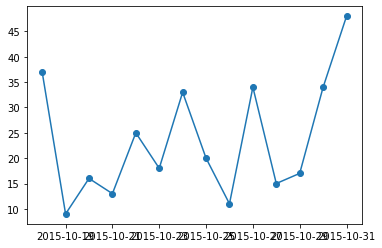

In [14]:
shop36 = sales_train[sales_train.shop_id == 36].groupby(sales_train.date).sum()
plt.plot(shop36.index, shop36.item_cnt_day, '-o');

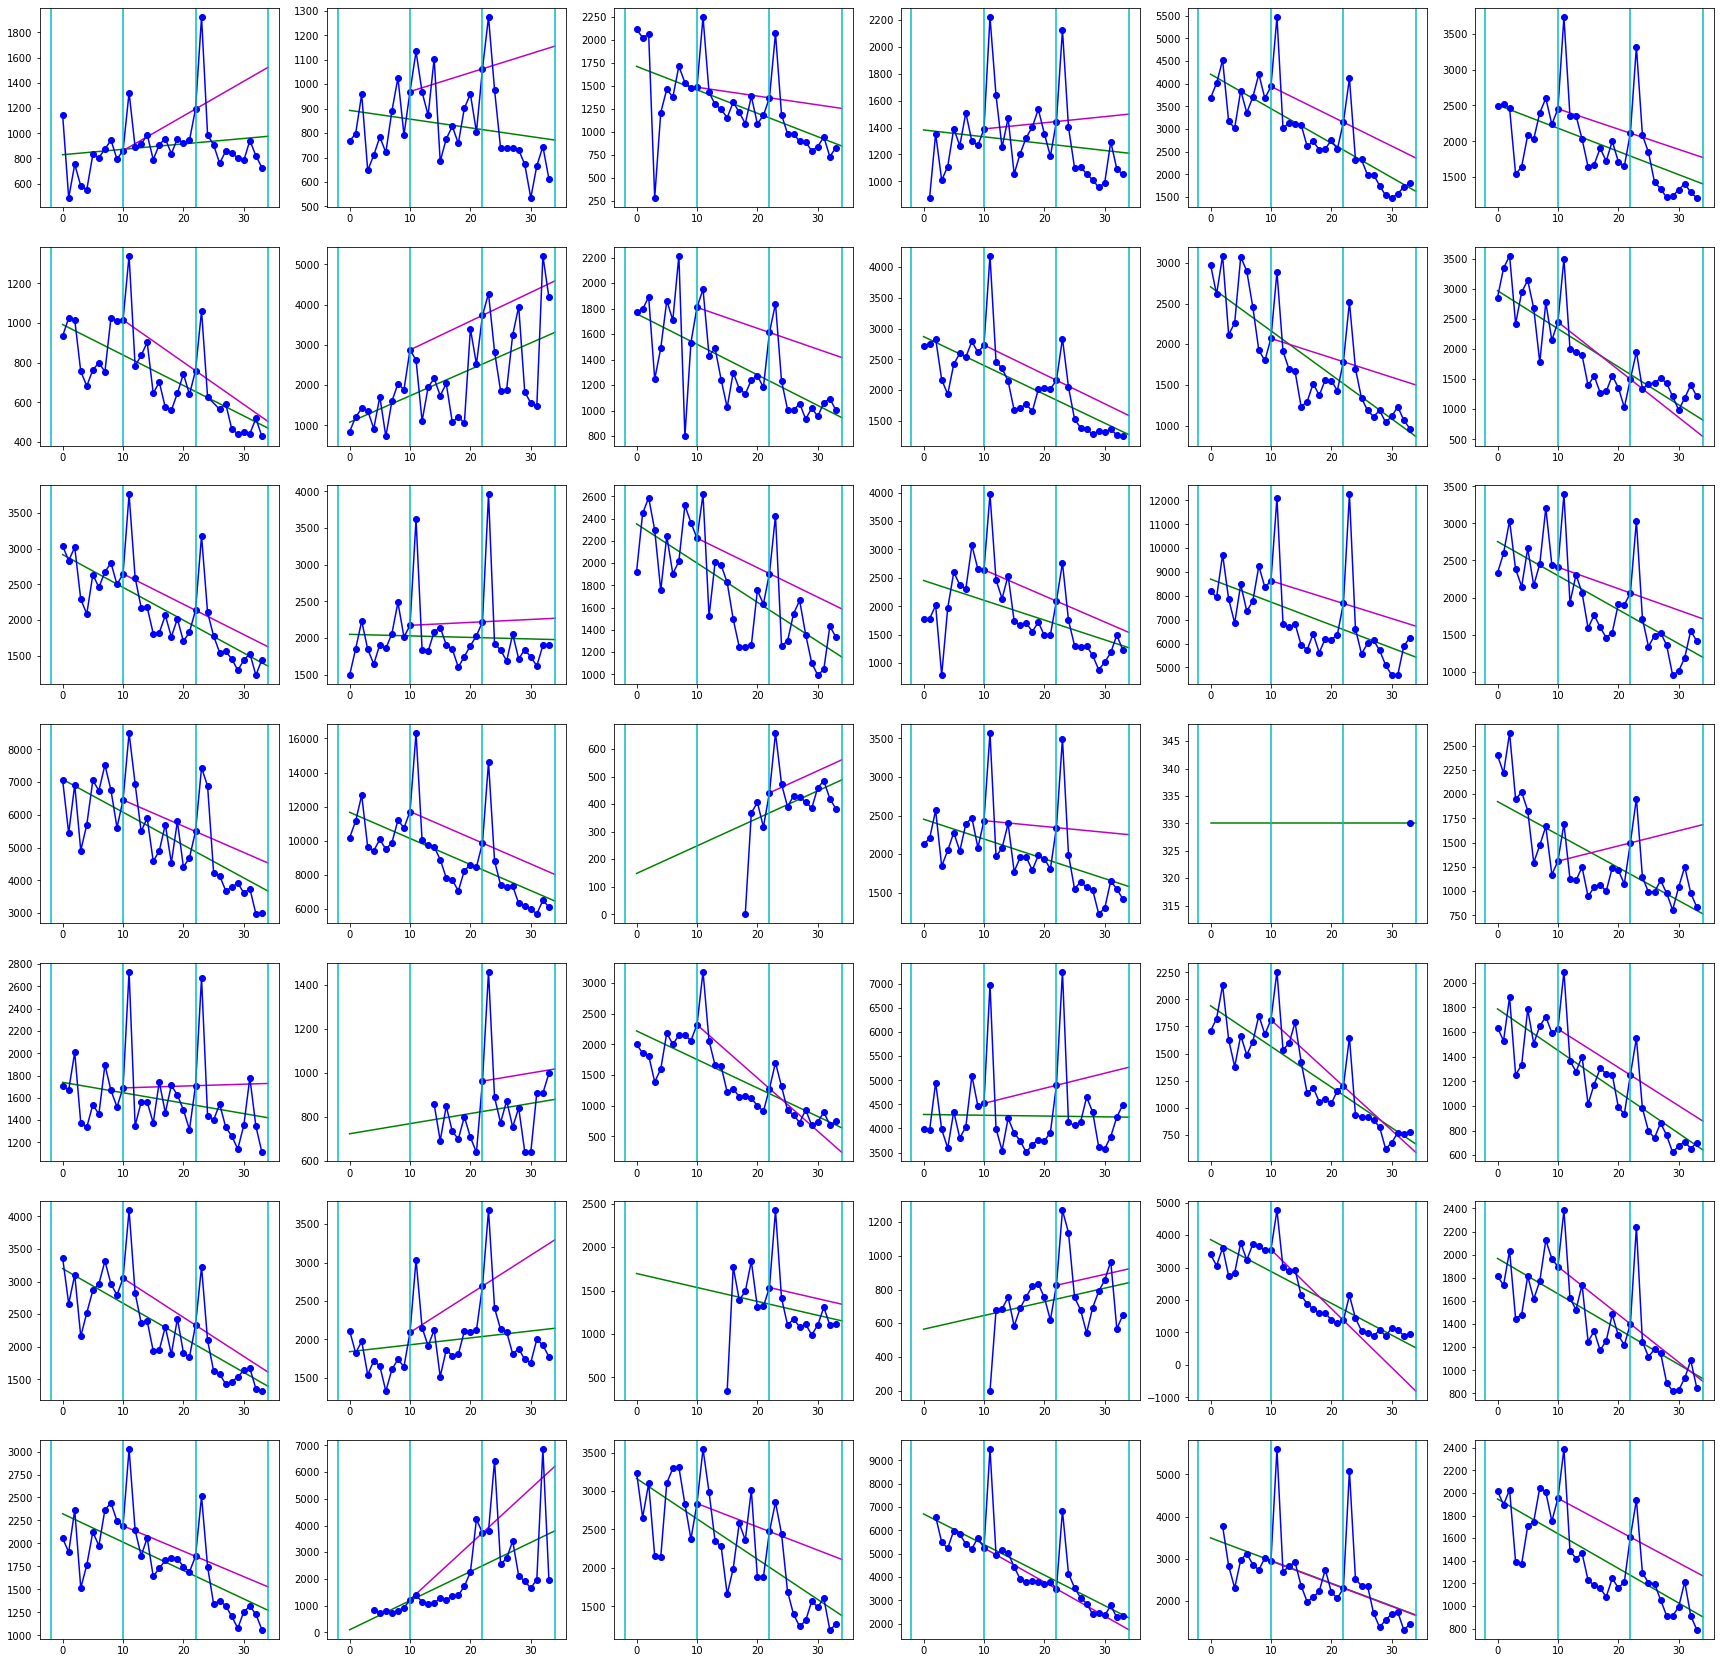

In [15]:
nov_line = []
fig, a = plt.subplots(nrows=7, ncols=6, figsize=(30, 30))
for i, a in enumerate(a.flatten()):
    one_shop_month_sum = sales_train.item_cnt_day[sales_train.shop_id == active_shops[i]].groupby(sales_train.date_block_num).sum()
    X = one_shop_month_sum.index.values.reshape(-1, 1)
    reg = LinearRegression().fit(X, one_shop_month_sum)
    pred = reg.predict([[0], [34]])
    a.plot([0, 34], pred, c='g')
    
    if 10 in one_shop_month_sum:
        nov = 2 * one_shop_month_sum[22] - one_shop_month_sum[10]
        a.plot([10, 34],[one_shop_month_sum[10], nov], c='m')
       
    elif 22 in one_shop_month_sum:
        nov = pred[1] + one_shop_month_sum[22] - reg.predict([[22]])
        a.plot([22, 34],[one_shop_month_sum[22], nov], c='m')
        
    else:
        nov = one_shop_month_sum[33]
    
    a.plot(one_shop_month_sum.index, one_shop_month_sum, '-ob')
    
    nov_line.append(nov / pred[1])

    for j in range(-2, 35, 12):
        a.axvline(j, c='c')

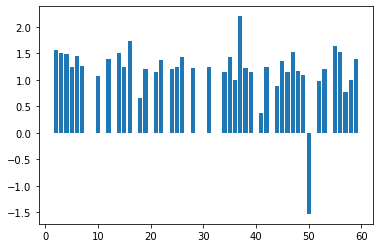

In [16]:
plt.bar(active_shops,nov_line);

In [17]:
test = pd.read_csv('test.csv')
len(test.item_id.groupby(test.shop_id).sum()), len(active_shops)

(42, 42)

In [18]:
active_sales_train = sales_train[~sales_train.shop_id.isin(na_shops)]
active_sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [19]:
items = pd.read_csv('items.csv')

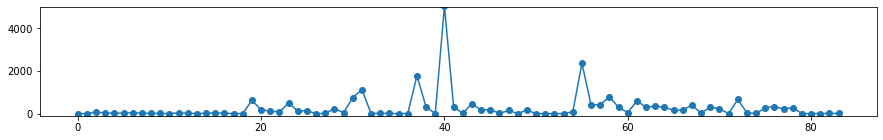

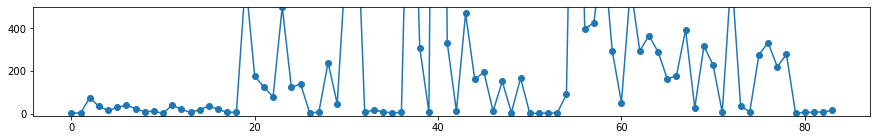

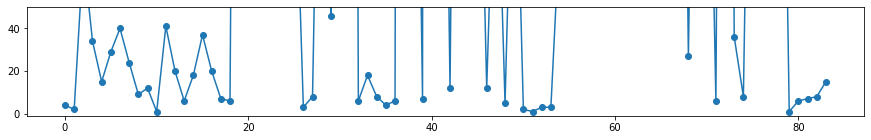

In [20]:
cats = items.item_id.groupby(items.item_category_id).count()
for i in range(3):
    plt.figure(figsize=(15,2))
    plt.plot(cats.index, cats.values, '-o')
    plt.ylim(-100 / 10**i, 5000 / 10**i)
    plt.show()

In [21]:
sales_train = pd.merge(sales_train, items[['item_id', 'item_category_id']], how='left', on='item_id')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-02,0,59,22154,999.00,1.0,37
1,2013-01-03,0,25,2552,899.00,1.0,58
2,2013-01-05,0,25,2552,899.00,-1.0,58
3,2013-01-06,0,25,2554,1709.05,1.0,58
4,2013-01-15,0,25,2555,1099.00,1.0,56
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,55
2935845,2015-10-09,33,25,7460,299.00,1.0,55
2935846,2015-10-14,33,25,7459,349.00,1.0,55
2935847,2015-10-22,33,25,7440,299.00,1.0,57


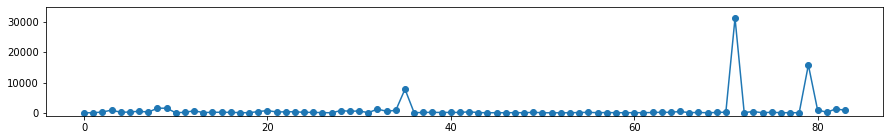

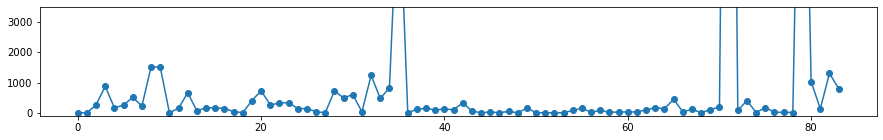

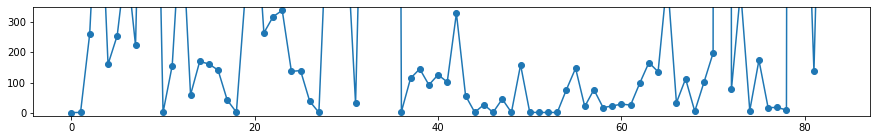

In [22]:
sum_cats = sales_train.item_cnt_day.groupby(sales_train.item_category_id).sum()
for i in range(3):
    plt.figure(figsize=(15,2))
    plt.plot(np.arange(84), (sum_cats / cats).values, '-o')
    plt.ylim(-1000 / 10**i, 35000 / 10**i)
    plt.show()

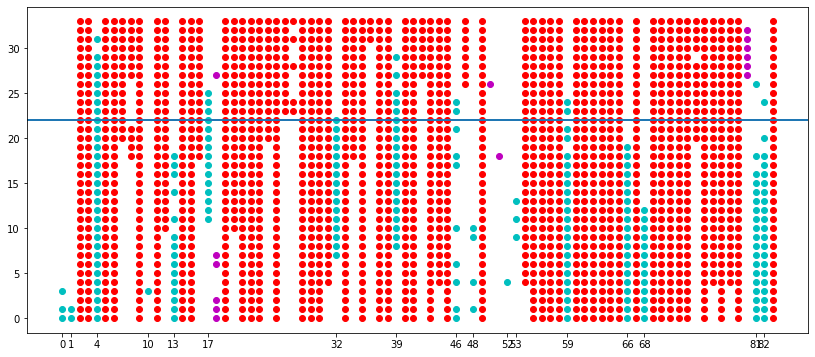

In [23]:
active_cats = []
na_cats = []
not_good = [0, 1, 4, 10, 13, 17, 32, 39, 46, 48, 52, 53, 59, 66, 68, 81, 82]
plt.figure(figsize=(14,6))
for i in range(84):
    one_cat_month_sum = sales_train.item_cnt_day[sales_train.item_category_id == i].groupby(sales_train.date_block_num).sum()
    if 33 in one_cat_month_sum.index:
        active_cats.append(i)
        clr = 'r'
    else:
        na_cats.append(i)
        if i in not_good:
            clr = 'c'
        else:
            clr = 'm'
    plt.scatter(np.full(len(one_cat_month_sum), i), one_cat_month_sum.index, c=clr)
    plt.axhline(22)
    plt.xticks(not_good);

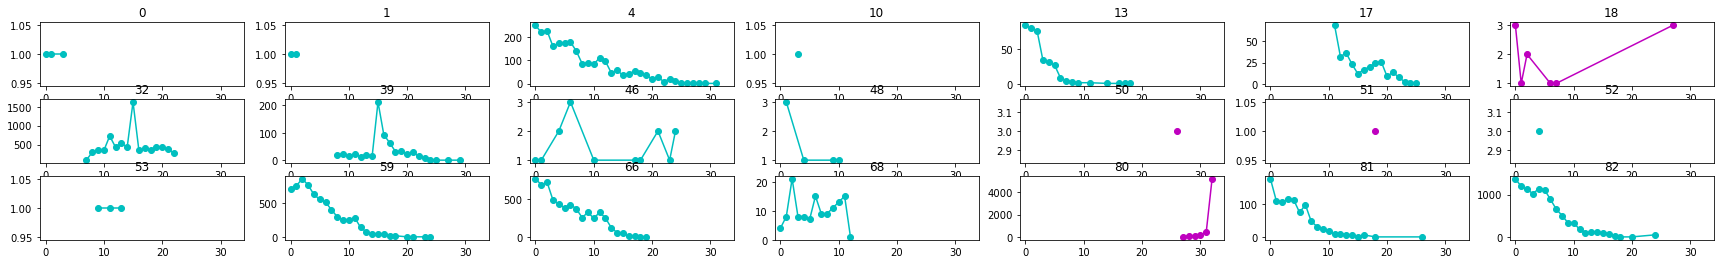

In [24]:
fig, a = plt.subplots(nrows=3, ncols=7, figsize=(30, 4))
for i, a in enumerate(a.flatten()):
    cat = sales_train[sales_train.item_category_id == na_cats[i]].groupby(sales_train.date_block_num).sum()
    if na_cats[i] in not_good:
        clr = 'c'
    else:
        clr = 'm'
    a.plot(cat.index, cat.item_cnt_day, 'o-', c=clr)
    a.set_title(na_cats[i])
    a.set_xlim(-1, 34)

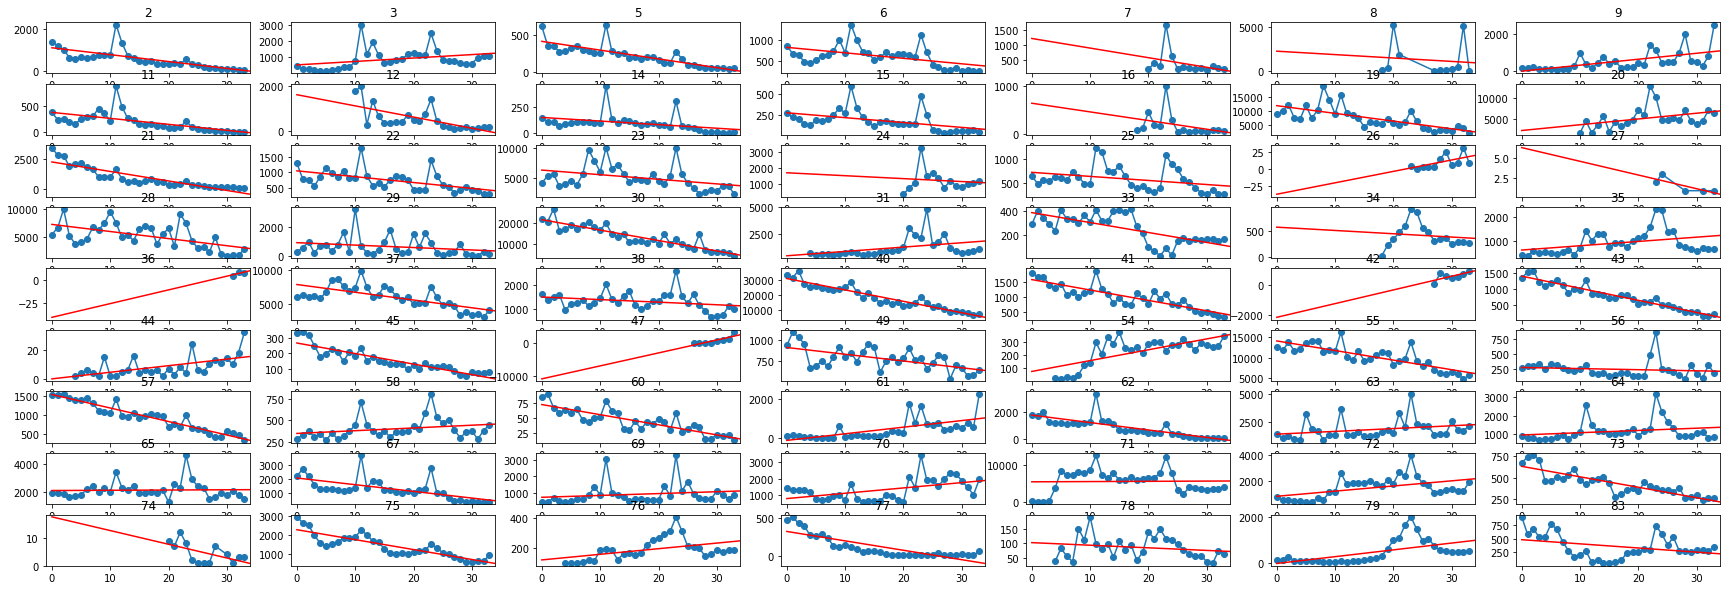

In [25]:
fig, a = plt.subplots(nrows=9, ncols=7, figsize=(30, 10))
for i, a in enumerate(a.flatten()):
    cat = sales_train[sales_train.item_category_id == active_cats[i]].groupby(sales_train.date_block_num).sum()
    a.plot(cat.index, cat.item_cnt_day, 'o-')
    X = cat.index.values.reshape(-1, 1)
    reg = LinearRegression().fit(X, cat.item_cnt_day)
    pred = reg.predict([[0], [34]])
    a.plot([0, 34], pred, c='r')
    a.set_title(active_cats[i]) 
    a.set_xlim(-1, 34)

In [26]:
def November_better(current_shop_df):
    # we are getting the monthly sum's of all item's
    shops_month_sum = current_shop_df.item_cnt_day.groupby(current_shop_df.date_block_num).sum()
    X = shops_month_sum.index.values.reshape(-1, 1)
    shop_reg = LinearRegression().fit(X, shops_month_sum)

    # we look if there is two November's or one or None
    if 10 in shops_month_sum:
        # we are making a line from 10 tru 22 pointing to 34
        nov = 2 * shops_month_sum[22] - shops_month_sum[10]

    elif 22 in shops_month_sum:
        # we see the dif by 22 and we apply it by 34
        nov = shop_reg.predict([[34]]) + shops_month_sum[22] - shop_reg.predict([[22]])

    else:
        # we make 34 like 33
        nov = shops_month_sum[33]
        
    better = nov / shop_reg.predict([[34]]).item()
    return better

In [27]:
%%time
# this is an empty df that will have all kinds (60 shops * 22170 items) 
all_kinds_df = pd.DataFrame(columns=['shop_id', 'item_id', 'item_cnt_month'])

# this is a small df that we use temporary for each shop
item_df = pd.DataFrame(np.arange(len(items)), columns=['item_id'])

# a loop for each shop to predict
for i in active_shops:
    # we are taking only the items that are in this shop
    current_shop_df = active_sales_train[active_sales_train.shop_id == i]
    current_items = current_shop_df.item_id.drop_duplicates().to_frame().reset_index(drop=True)

    # we are multiplying each item by 34 with a outer join
    current_items['key'] = 1
    date_block_num = pd.DataFrame({'date_block_num': np.arange(34), 'key': 1})
    items_all_monts = pd.merge(current_items, date_block_num, on='key').drop("key", 1)

    # we are getting the sum's of the month's that have a sum and filling the rest with 0
    mont_sums = current_shop_df.item_cnt_day.groupby([current_shop_df.item_id,
                                                      current_shop_df.date_block_num]).sum().to_frame()
    all_mont_sm = pd.merge(items_all_monts, mont_sums, on=['item_id', 'date_block_num'], how='left').fillna(0)
    
    # we are getting the percentage of November for this shop
    percent = November_better(current_shop_df)

    # filling 0 to clear the previous predictions here we are putting our predictions
    item_df['item_cnt_month'] = 0
    # we put here the shop id
    item_df['shop_id'] = i

    # X and y for regression
    X = np.arange(34).reshape(-1, 1)
    for j in range(0, len(all_mont_sm), 34):
        y = all_mont_sm.item_cnt_day.iloc[j:j + 34].values.reshape(-1, 1)

        # we are predicting for the 35'th month and increcing it for November
        reg = LinearRegression().fit(X, y)
        pred_34 = reg.predict([[34]]) * percent
        

        # we are putting here the prediction
        indx = all_mont_sm.loc[j, 'item_id']
        item_df.loc[indx, 'item_cnt_month'] = pred_34.item()

    # we keep on appending each shop's prediction's to all_kinds_df
    all_kinds_df = all_kinds_df.append(item_df, ignore_index=True)    

Wall time: 5min 59s


In [28]:
test = pd.read_csv('test.csv')
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [29]:
submission = pd.merge(test, all_kinds_df, on =['shop_id', 'item_id'])
submission = submission[['ID', 'item_cnt_month']]
submission

,ID,item_cnt_month
0,0,1.359762
1,1,0.000000
2,2,1.273533
3,3,0.132660
4,4,0.000000
...,...,...
214195,214195,0.912690
214196,214196,0.000000
214197,214197,0.167935
214198,214198,0.000000


In [30]:
submission.to_csv('sales2_folder/submission2.csv', index=False)